## describe data ##

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/car_data.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
data.shape

(11914, 16)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## plt data ##

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns


# plt.figure(figsize = (20, 15))
# sns.countplot(y = data.Make)
# plt.title("Car companies with their cars", fontsize = 20)
# plt.show()

In [6]:
# plt.figure(figsize = (20, 15))
# sns.countplot(x = data.Year)
# plt.title("Number of cars in different years", fontsize = 20)
# plt.show()

In [7]:
# plt.figure(figsize = (15,8))
# sns.countplot(x = data['Transmission Type'])
# plt.title("Transmission Type", fontsize = 20)
# plt.show()

## describe unique data ##

In [8]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

##  find missing value  ##

 total missing value is : Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


<Axes: >

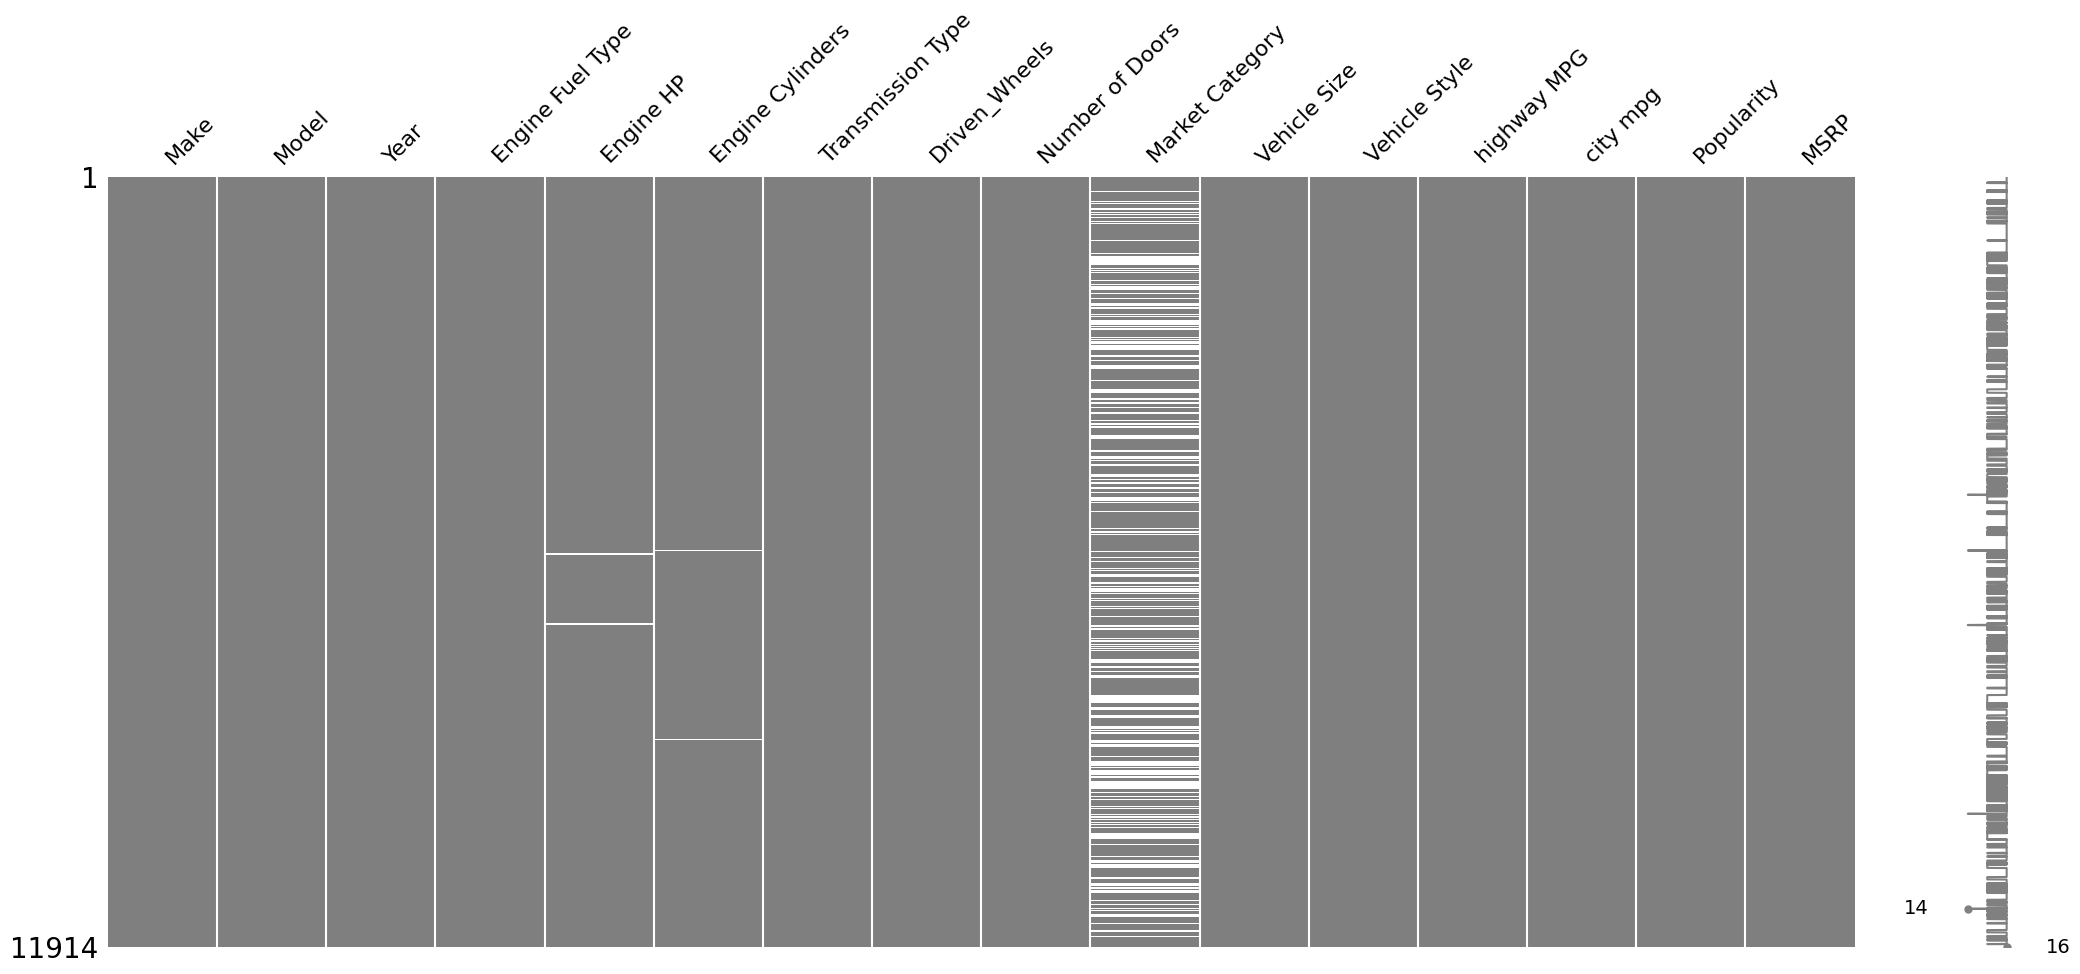

In [9]:
import missingno as msno


df = pd.DataFrame(data)
missing_value = df.isnull().sum()
print(" total missing value is :", missing_value)

msno.matrix(data, color = (0.5, 0.5, 0.5))

## chack corelation cofficient 

In [10]:
corr_data = data[['Engine HP', 'highway MPG', 'city mpg', 'Popularity','Year','Engine Cylinders', 'MSRP']]
corr_matrix = corr_data.corr()
print(corr_matrix["MSRP"].sort_values(ascending=False))


MSRP                1.000000
Engine HP           0.662008
Engine Cylinders    0.531312
Year                0.227590
Popularity         -0.048476
city mpg           -0.157676
highway MPG        -0.160043
Name: MSRP, dtype: float64


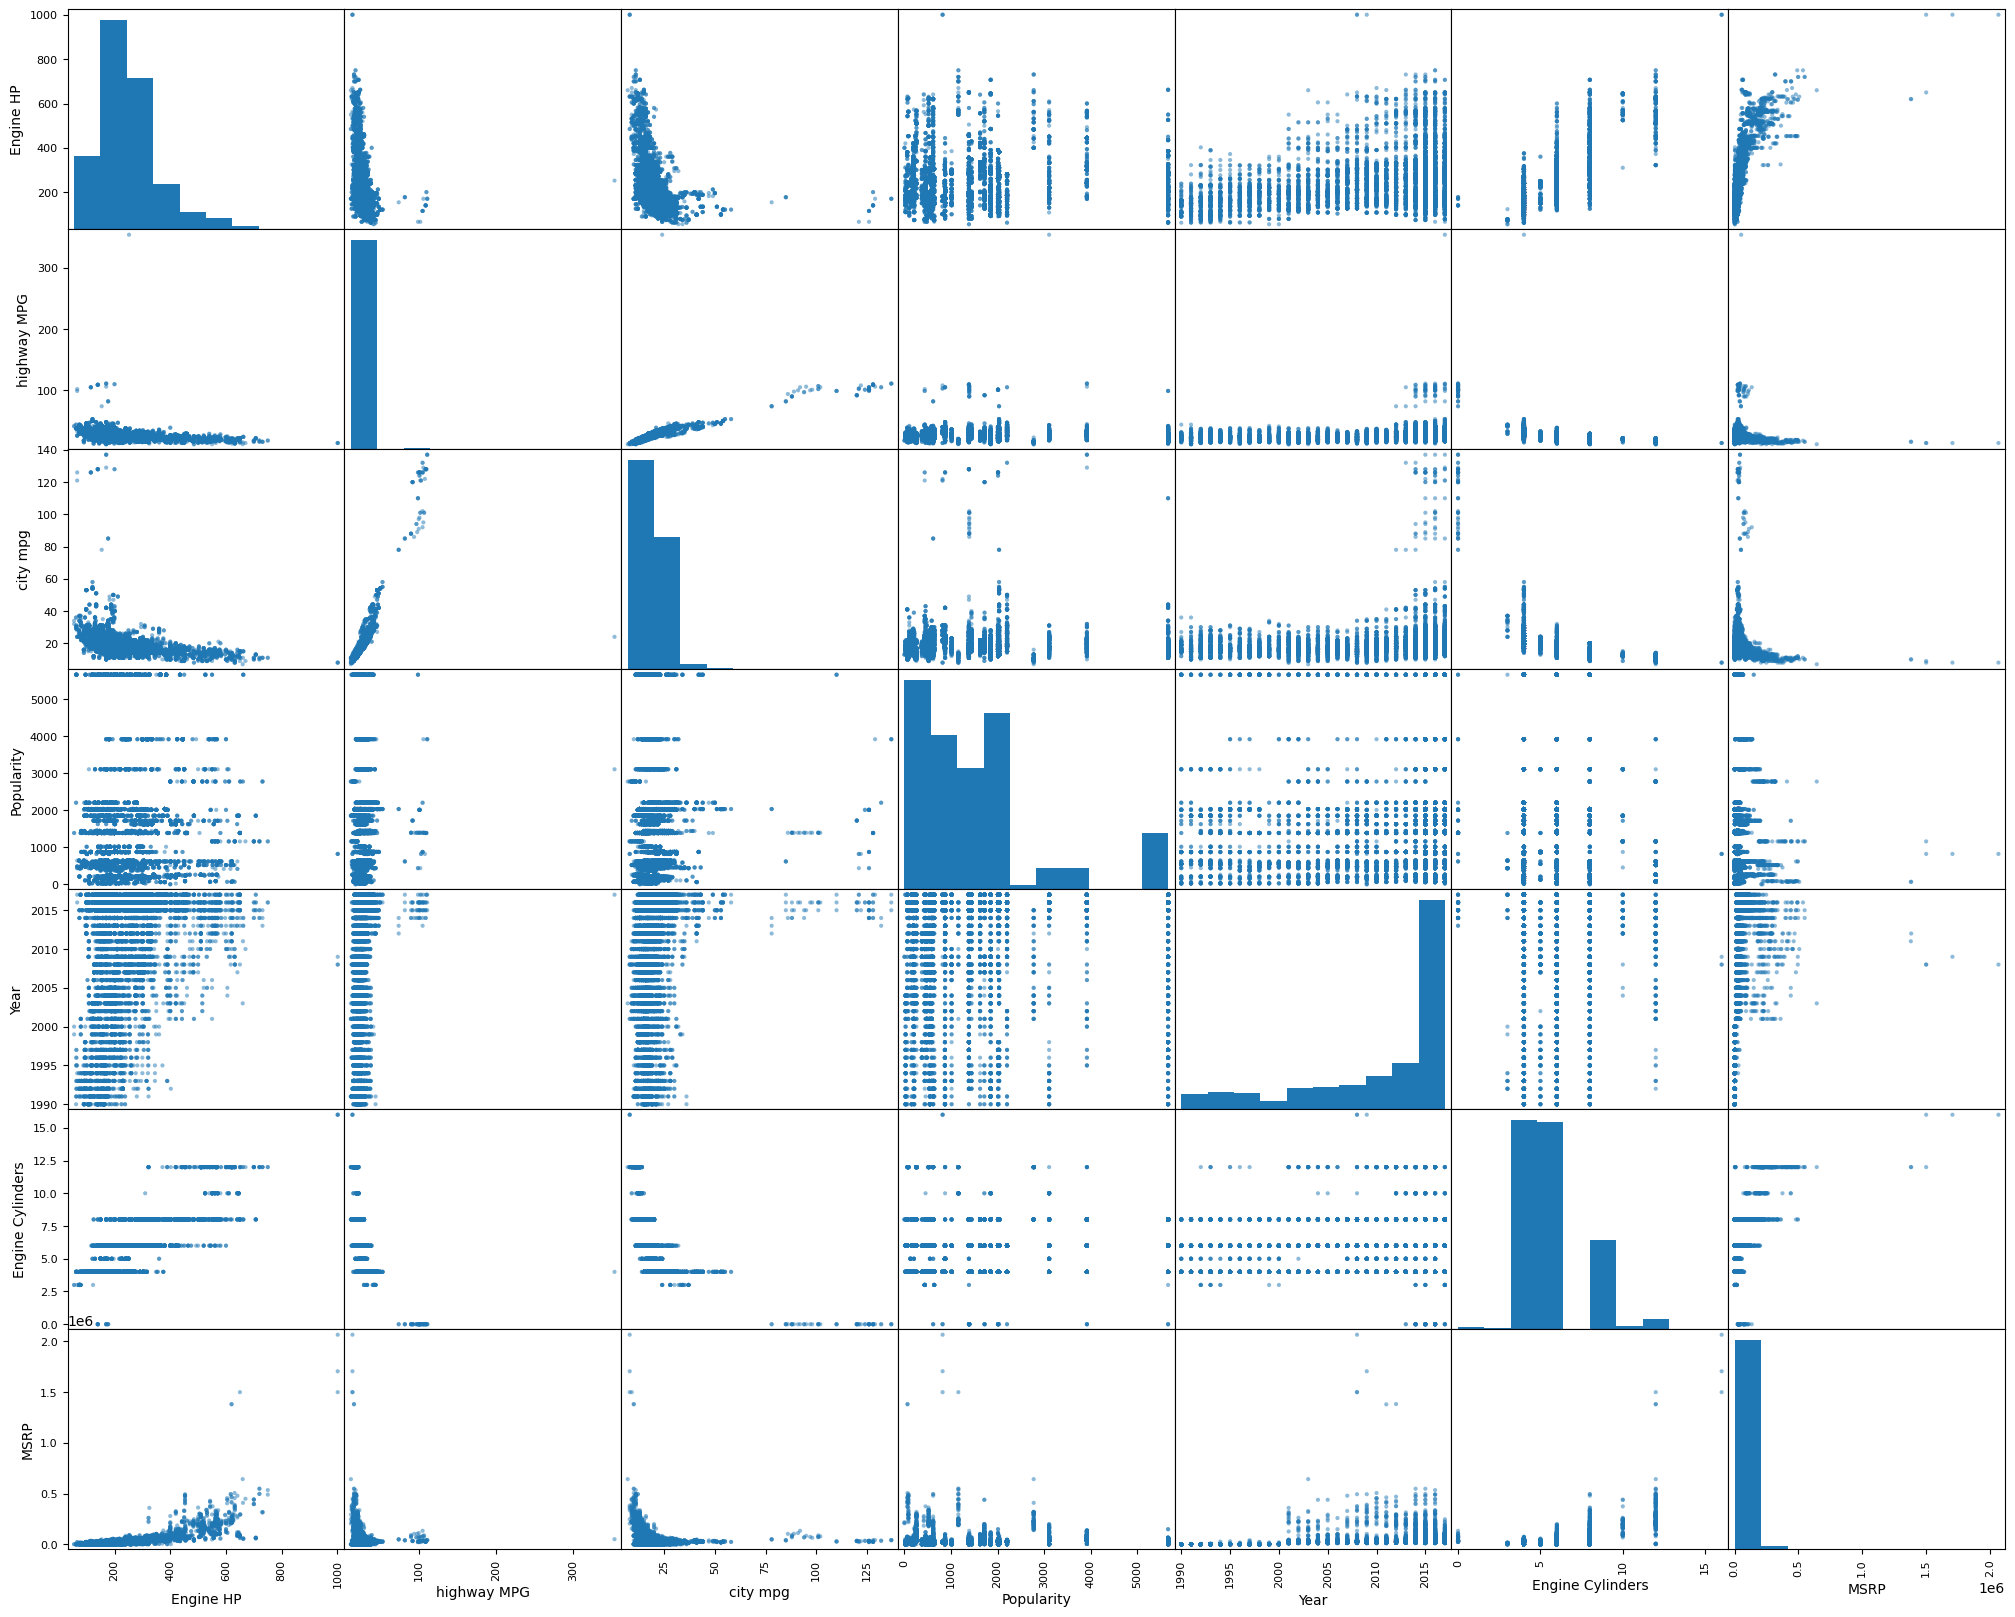

In [11]:
from pandas.plotting import scatter_matrix



attributes = ['Engine HP', 'highway MPG', 'city mpg', 'Popularity','Year','Engine Cylinders','MSRP']
scatter_matrix(data[attributes], figsize=(25,20))
plt.show()



## Groupby

In [12]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min','max', 'mean'])


Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

In [13]:
# plt.figure(figsize = (15, 8))
# data.groupby('Year')['MSRP'].mean().plot(kind = 'bar')
# plt.title("avg. price in each year", fontsize = 20)
# plt.show()

In [14]:
# plt.figure(figsize = (20, 10))
# data.groupby('Engine Fuel Type')['MSRP'].mean().plot(kind = 'barh')
# plt.title("avg. price as per Engine Fuel Type", fontsize = 25)
# plt.show()

In [15]:
# plt.figure(figsize = (15, 8))
# data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'barh')
# plt.title("avg. price as per Transmission Type", fontsize = 25)
# plt.show()

In [16]:
# plt.figure(figsize = (20, 15))
# data.groupby(['Make'])['MSRP'].mean().sort_values(ascending = False).plot(kind = 'bar', fontsize = 15)
# plt.title("The average price of cars of different companies", fontsize = 20)
# plt.show()


In [17]:
# plt.figure(figsize = (15, 15))
# data.groupby('Make')['Popularity'].mean().sort_values(ascending = True).plot(kind = 'barh')
# plt.yticks(fontsize = 10)
# plt.title("Popularity of various car brands", fontsize = 15)
# plt.show()

## Scatterplot between 'highway MPG' and 'city mpg'


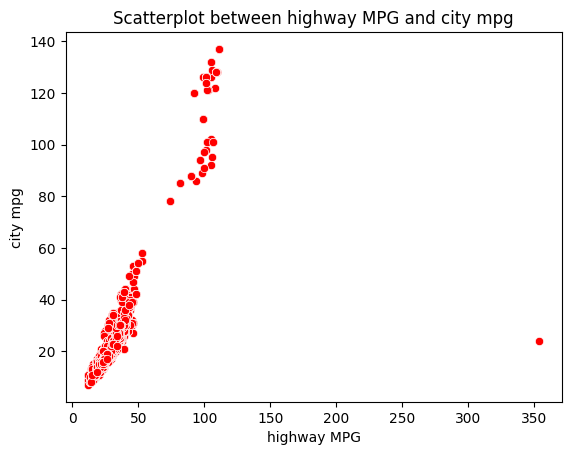

In [18]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

* remove one outline point 

In [19]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [20]:
data = data[data['highway MPG'] < 350]

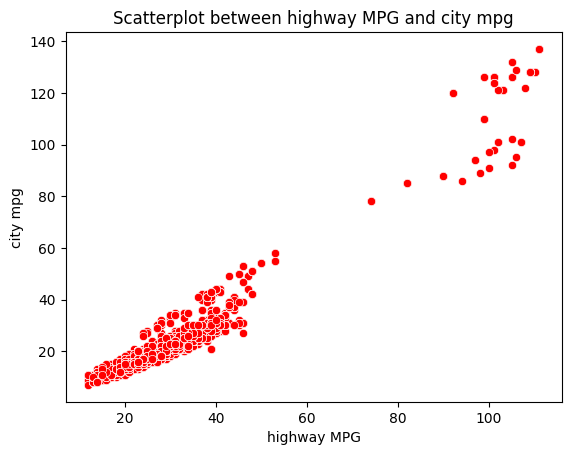

In [21]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [22]:
# data['Market Category'].unique()

## remove one outline point using boxplot ##

<Axes: ylabel='highway MPG'>

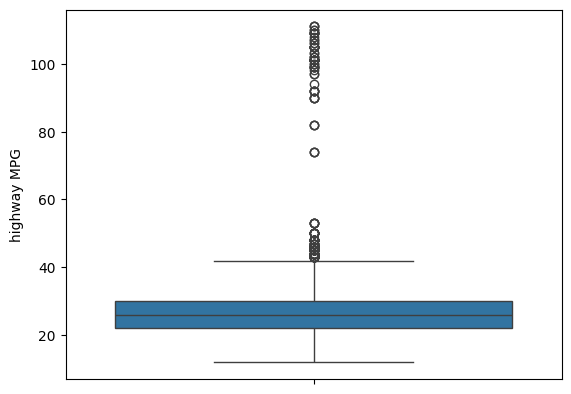

In [23]:
sns.boxplot(data["highway MPG"])

<Axes: ylabel='highway MPG'>

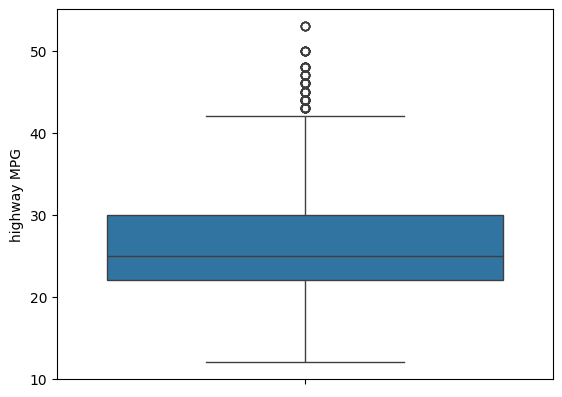

In [24]:
data = data[data["highway MPG"] < 60]
sns.boxplot(data["highway MPG"])

<Axes: ylabel='city mpg'>

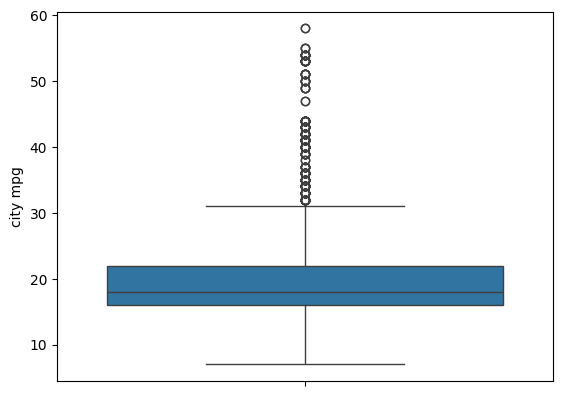

In [25]:
sns.boxplot(data["city mpg"])

In [26]:
# data[data['city mpg'] > 45] 

In [27]:
data = data[data["city mpg"] < 45]

<Axes: ylabel='Engine HP'>

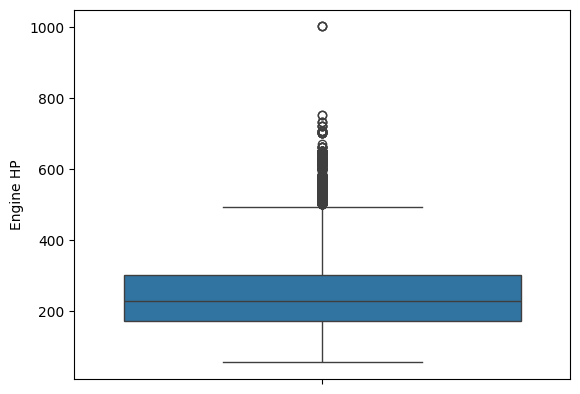

In [28]:
sns.boxplot(data["Engine HP"])

In [29]:
 # data[data['Engine HP']  > 750 ]

<Axes: ylabel='Engine HP'>

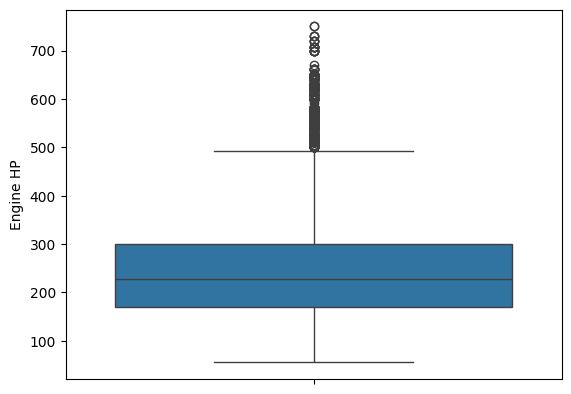

In [30]:
data = data[data['Engine HP']  < 800 ]
sns.boxplot(data["Engine HP"])

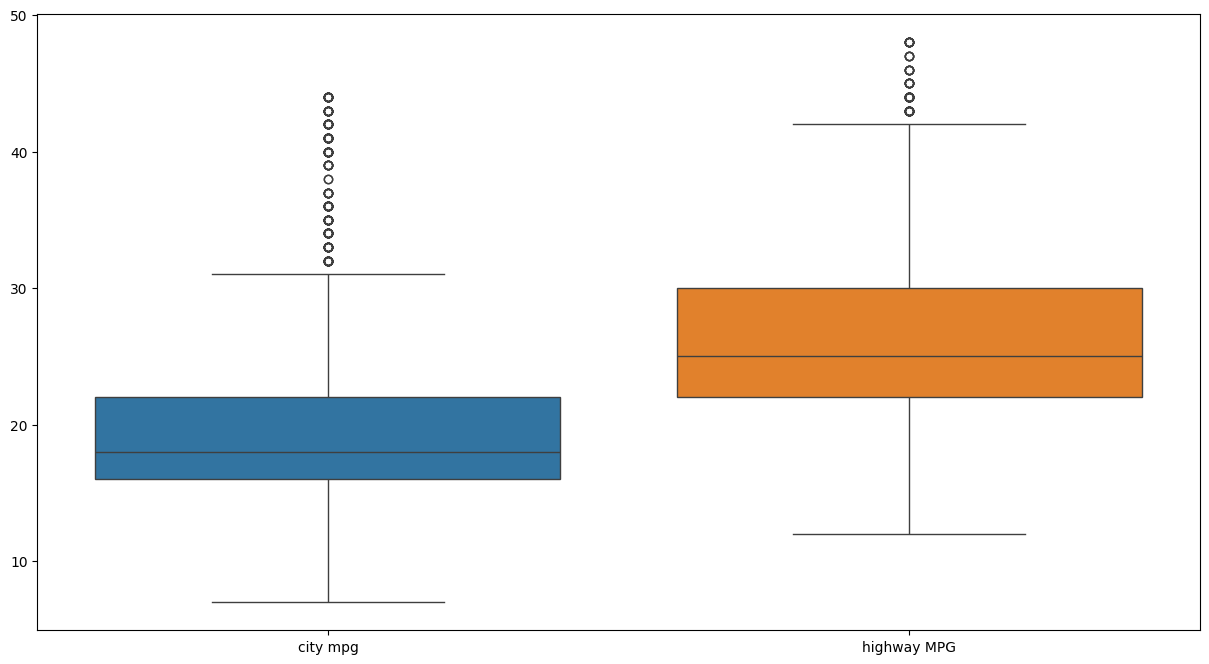

In [31]:
plt.figure(figsize = (15,8))
sns.boxplot(data = data[["city mpg" , "highway MPG"]])
plt.show()

## lmplot between 'Engine HP' and 'Popularity'

is that there is a linear line which has a positive slope. What this means is that with the increase in 'Engine HP', there is a higher chance of increase in 'Popularity' respectively.|

<Figure size 800x800 with 0 Axes>

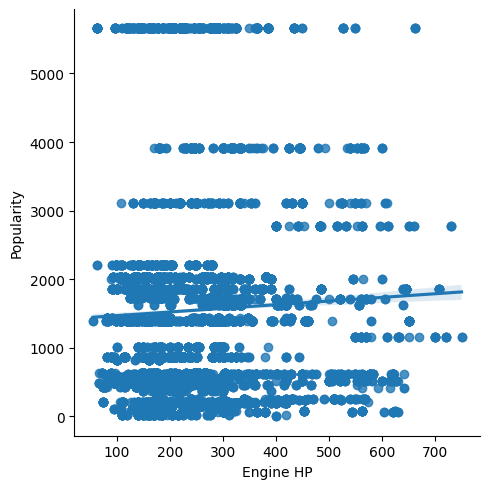

In [32]:
plt.figure(figsize = (8,8))
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)

<Figure size 1000x1000 with 0 Axes>

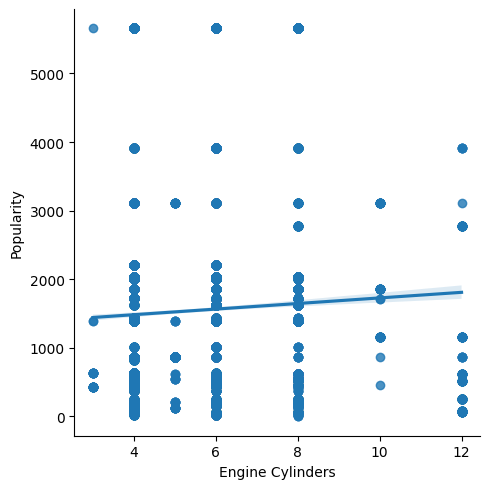

In [33]:
plt.figure(figsize = (10,10))
sns.lmplot(x = 'Engine Cylinders', y = 'Popularity', data = data)

<Figure size 1000x1000 with 0 Axes>

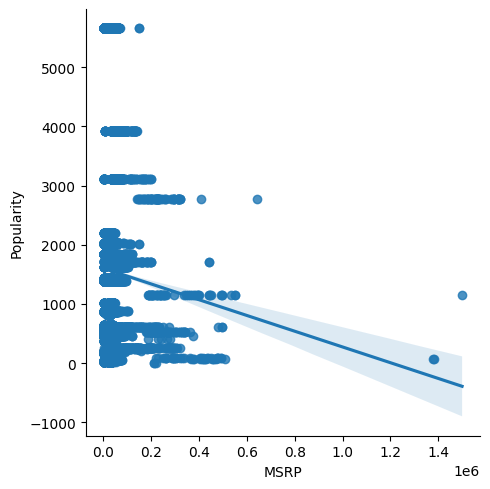

In [34]:
plt.figure(figsize = (10,10))
sns.lmplot(x = 'MSRP', y = 'Popularity', data = data)

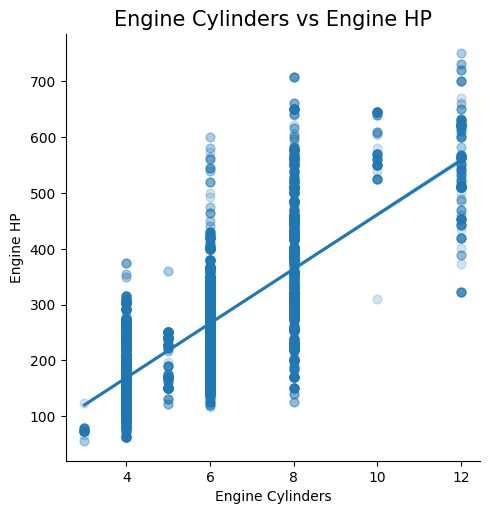

In [35]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

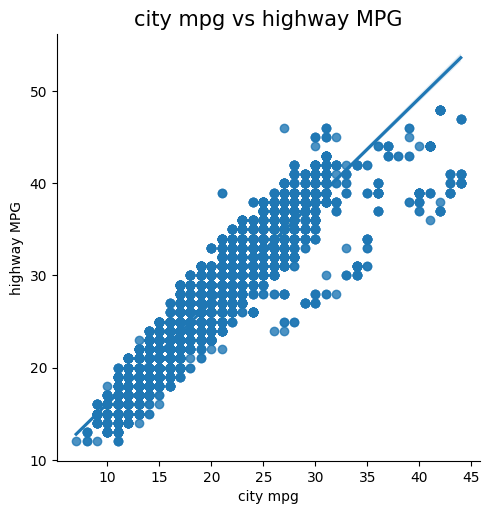

In [36]:
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)
plt.title("city mpg vs highway MPG", fontsize = 15)
plt.show()

<Axes: >

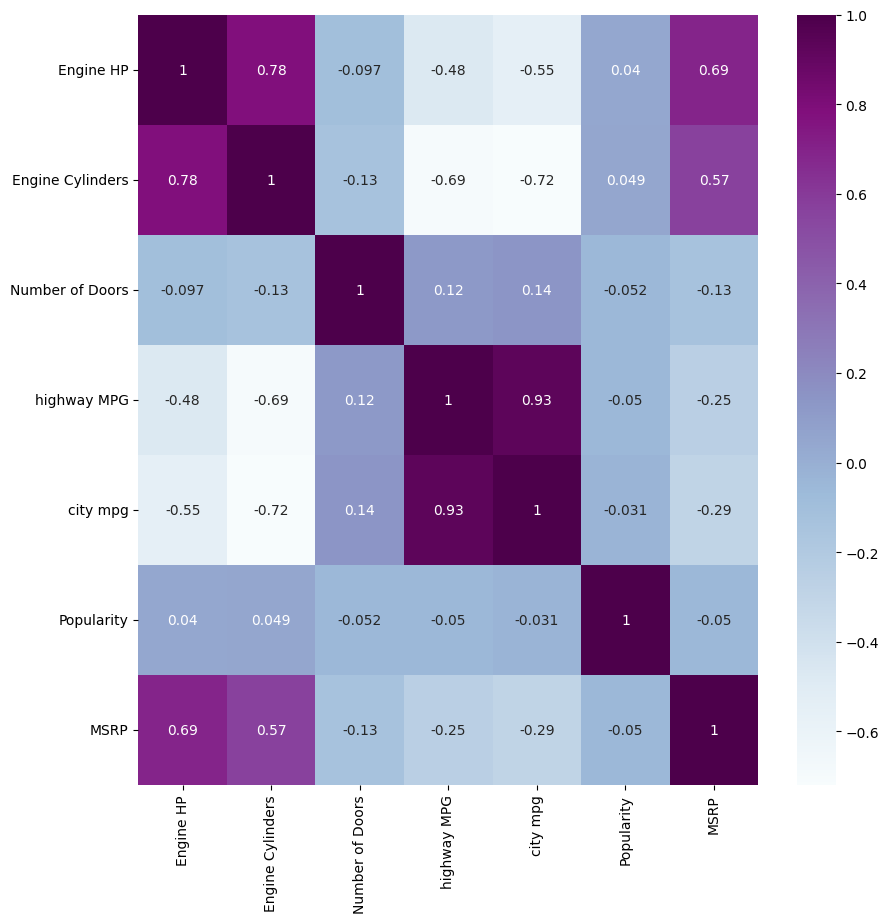

In [37]:
plt.figure(figsize = (10, 10))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity','MSRP']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

## Checking the NULL values and remove or fill

In [38]:
data.isnull().sum() 

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3731
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [39]:
data['Number of Doors'].median()

np.float64(4.0)

In [40]:
# data["Number of Doors"] = data["Number of Doors"].fillna(4.0, inplace = True)
# data['Number of Doors'].fillna(4.0, inplace = True)
# data.fillna({'Number of Doors' : 4.0}, inplace = True)


data.loc[:, 'Number of Doors'] = data['Number of Doors'].fillna(4.0)



In [41]:
data["Number of Doors"].isnull().sum()

np.int64(0)

## create new colom year of manufacture 

* add present year col.

In [42]:
data['Present Year'] = 2025

In [43]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2025
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2025
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2025
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2025
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2025


In [44]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']

* remuve present year

In [45]:
data.drop(['Present Year'], inplace = True, axis = 1)

In [46]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Years Of Manufacture
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,14
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,14
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,14
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,14
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,14


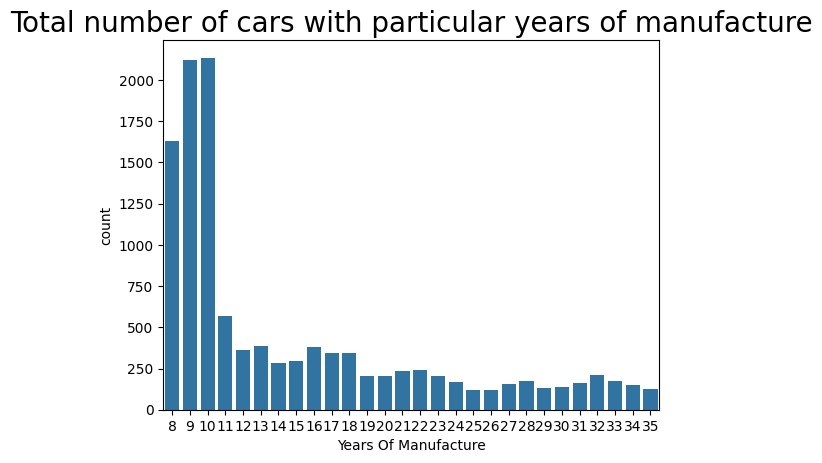

In [47]:
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize = 20)
plt.show()

In [48]:
type("data['Engine Fuel Type'].mode()")

str

In [49]:
# data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

# df.method({col: value}, inplace=True
data.fillna({'Engine Fuel Type': "data['Engine Fuel Type'].mode()"}, inplace=True)

In [50]:
data['Engine Fuel Type'].isnull().sum()

np.int64(0)

In [51]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan])

In [52]:
data.fillna({"Engine Cylinders" : 4}, inplace = True)

In [53]:
data['Engine Cylinders'].isnull().sum()

np.int64(0)

In [54]:
data["Market Category"].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance', 'Hybrid',
   

In [55]:
data.drop(['Market Category'], inplace = True, axis = 1)

In [56]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11773 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  11773 non-null  object 
 1   Model                 11773 non-null  object 
 2   Year                  11773 non-null  int64  
 3   Engine Fuel Type      11773 non-null  object 
 4   Engine HP             11773 non-null  float64
 5   Engine Cylinders      11773 non-null  float64
 6   Transmission Type     11773 non-null  object 
 7   Driven_Wheels         11773 non-null  object 
 8   Number of Doors       11773 non-null  float64
 9   Vehicle Size          11773 non-null  object 
 10  Vehicle Style         11773 non-null  object 
 11  highway MPG           11773 non-null  int64  
 12  city mpg              11773 non-null  int64  
 13  Popularity            11773 non-null  int64  
 14  MSRP                  11773 non-null  int64  
 15  Years Of Manufacture  11

## Shuffling and split the data


* shuffled data

In [58]:
# StratifiedShuffleSplit use only if data["example"] unique value is only 2 (minimum) like 0 or 1

# from sklearn.model_selection import StratifiedShuffleSplit

# shuffled_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# for train_index, test_index in splitter.split(data, data["Vehicle Size"]):
#     train_set = data.iloc[train_index]
#     test_set = data.iloc[test_index]

# test_set['Vehicle Size'].value_counts()

In [59]:
from sklearn.utils import shuffle 

shuffled_data = shuffle(data, random_state = 42)
X = shuffled_data.drop(['MSRP'], axis = 1)
Y = shuffled_data['MSRP']

* split data

In [60]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [61]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(Y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(Y_test.shape))

The size of the input train data is: (9418, 15)
The size of the output train data is: (9418,)
The size of the input test data is: (2355, 15)
The size of the output test data is: (2355,)


In [62]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1838,Volkswagen,Beetle Convertible,2015,premium unleaded (recommended),210.0,4.0,MANUAL,front wheel drive,2.0,Compact,Convertible,31,23,873,10
3170,Chevrolet,Cruze,2017,regular unleaded,153.0,4.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,39,28,1385,8
2104,Volvo,C30,2012,premium unleaded (recommended),227.0,5.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,29,21,870,13
9714,Hyundai,Sonata Hybrid,2016,regular unleaded,193.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,43,39,1439,9
6699,Lincoln,Mark LT,2008,regular unleaded,300.0,8.0,AUTOMATIC,rear wheel drive,4.0,Large,Crew Cab Pickup,16,12,61,17


In [63]:
# learn what is encoding datga 

In [64]:
from category_encoders import TargetEncoder, OneHotEncoder
X_train['Year_Encode'] = X_train.groupby('Year')['MSRP'].transform('mean')




ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, Y_train)
